In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.stats import percentileofscore
from sw_tracking import combine_speed_and_surf_dist
# from sw_plotting import plot_cum_dist, plot_dist
# from sw_plotting import plot_track_distance_to_surface

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# make a folder to store figures if not already there
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
track_mean_speed_file = '../data/SMG-tracking-data-bud-ROIs/2020-01-25-K14R-HisG-2photon-25x-2-denoised_Statistics-within-bud-ROI/2020-01-25-K14R-HisG-2photon-25x-2-denoised_Track_Speed_Mean.csv'
track_spot_surf_dist_file = '../data/SMG-tracking-data-bud-ROIs/2020-01-25-K14R-HisG-2photon-25x-2-denoised_Statistics-within-bud-ROI/2020-01-25-K14R-HisG-2photon-25x-2-denoised_Shortest_Distance_to_Surfaces_Surfaces=Surfaces_1.csv'
df_merged = combine_speed_and_surf_dist(track_mean_speed_file, track_spot_surf_dist_file)
df_merged.head()

2021-03-08 07:14:52,295 - INFO - NumExpr defaulting to 8 threads.


,Mean_Track_Speed,Unit,Category,ID,Unnamed: 4,mean_dist_surf,min_dist_surf,max_dist_surf
0,12.6599,um/h,Track,1000000000,NaN,-1.472021,-5.77230,0.233456
1,20.0592,um/h,Track,1000000001,NaN,-9.853831,-21.47790,-5.524840
2,15.0846,um/h,Track,1000000002,NaN,-7.119135,-8.03049,-6.364630
3,23.7869,um/h,Track,1000000003,NaN,-10.085355,-12.88790,-7.463920
4,18.7699,um/h,Track,1000000004,NaN,-10.049233,-14.50180,-7.418020


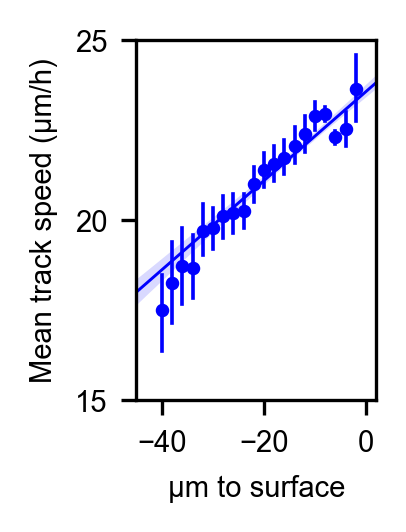

In [9]:
with matplotlib.rc_context({"lines.linewidth": .5}):

    fig = plt.figure(figsize=(1.0, 1.5), dpi=300)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    sns.regplot(data=df_merged,
                ax=ax,
                x='max_dist_surf', y='Mean_Track_Speed',
                color='blue',
                scatter_kws={'s': 5},
                line_kws={'lw': .7},
                x_bins=list(range(-40, 0, 2)))
    
    # Customize labels
    
    ax.set_xlabel('µm to surface')
    ax.set_ylabel('Mean track speed (µm/h)')
    
    ax.set_xlim([-45, 2])
    ax.set_ylim([16, 25])

    ax.set_xticks([-40, -20, 0])
    ax.set_yticks([15, 20, 25])
    
    # Remove excessive clipping to easy editing of styles
    
#     for o in fig.findobj():
#         o.set_clip_on(False)
#     for o in ax.findobj():
#         o.set_clip_on(False)
    
    # Save figure
    output_prefix = 'SMG_epi_track_speed_over_distance'
    outputFigPath = '../jupyter_figures/'+output_prefix+'.svg'
    plt.savefig(outputFigPath)

In [4]:
df_merged.head()

,Mean_Track_Speed,Unit,Category,ID,Unnamed: 4,mean_dist_surf,min_dist_surf,max_dist_surf
0,12.6599,um/h,Track,1000000000,NaN,-1.472021,-5.77230,0.233456
1,20.0592,um/h,Track,1000000001,NaN,-9.853831,-21.47790,-5.524840
2,15.0846,um/h,Track,1000000002,NaN,-7.119135,-8.03049,-6.364630
3,23.7869,um/h,Track,1000000003,NaN,-10.085355,-12.88790,-7.463920
4,18.7699,um/h,Track,1000000004,NaN,-10.049233,-14.50180,-7.418020


In [5]:
print("Total number of tracks: ", df_merged.ID.nunique())

Total number of tracks:  8904


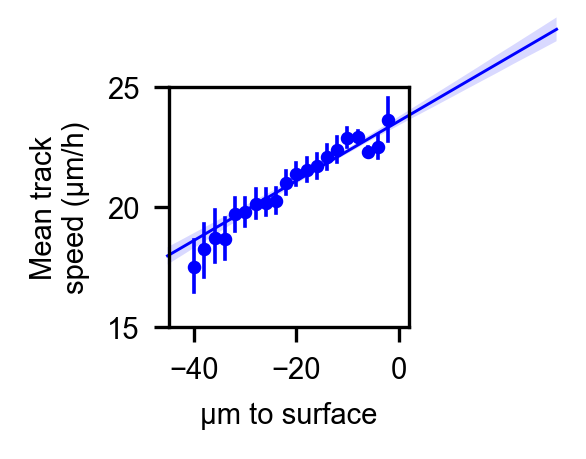

In [6]:
with matplotlib.rc_context({"lines.linewidth": .5}):

    fig = plt.figure(figsize=(1, 1), dpi=300)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    sns.regplot(data=df_merged,
                ax=ax,
                x='max_dist_surf', y='Mean_Track_Speed',
                color='blue',
                scatter_kws={'s': 5},
                line_kws={'lw': .7},
                x_bins=list(range(-40, 0, 2)))
    
    # Customize labels
    
    ax.set_xlabel('µm to surface')
    ax.set_ylabel('Mean track\nspeed (µm/h)')
    
    ax.set_xlim([-45, 2])
    ax.set_ylim([16, 25])

    ax.set_xticks([-40, -20, 0])
    ax.set_yticks([15, 20, 25])
    
    # Remove excessive clipping to easy editing of styles
    
    for o in fig.findobj():
        o.set_clip_on(False)
    for o in ax.findobj():
        o.set_clip_on(False)
    
    # Save figure
    output_prefix = 'SMG_epi_track_speed_over_distance'
    outputFigPath = '../jupyter_figures/'+output_prefix+'-no-clipping.svg'
    plt.savefig(outputFigPath)